### **Показатели IC₅₀, CC₅₀ и SI: объяснение и расчет**  

#### **1. IC₅₀ (Half Maximal Inhibitory Concentration)**  
- **Определение:** Концентрация соединения, необходимая для **подавления активности вируса на 50%** in vitro.  
- **Интерпретация:**  
  - Чем **меньше IC₅₀**, тем выше эффективность.  
  - Пример: IC₅₀ = 0.1 μM (сильный ингибитор) vs. IC₅₀ = 50 μM (слабый).  
- **Единицы:** μM или nM.  

#### **2. CC₅₀ (Half Maximal Cytotoxic Concentration)**  
- **Определение:** Концентрация, при которой **гибнет 50% клеток** из-за токсичности.  
- **Интерпретация:**  
  - Чем **выше CC₅₀**, тем безопаснее соединение.  
  - Пример: CC₅₀ = 100 μM (низкая токсичность) vs. 5 μM (высокая).  

#### **3. SI (Selectivity Index)**  
- **Формула:**  
  $$
  SI = \frac{CC_{50}}{IC_{50}}
  $$  
- **Интерпретация:**  
  - **SI > 10**: Перспективный кандидат.  
  - **SI < 1**: Опасная токсичность.  
  - Пример:  
    - IC₅₀ = 2 μM, CC₅₀ = 100 μM → **SI = 50** (отлично).  
    - IC₅₀ = 10 μM, CC₅₀ = 5 μM → **SI = 0.5** (токсично).  


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (
    SelectFromModel, 
    mutual_info_regression, 
    mutual_info_classif, 
    f_classif,
)
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor, XGBClassifier
from matplotlib_venn import venn3

In [64]:
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.shape

(1001, 214)

In [66]:
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


Как можно заметить в данных имеются признаки типа float64 и int64, что упрощает процесс Feature Engineering.

In [68]:
for i in df:
    print(i)

Unnamed: 0
IC50, mM
CC50, mM
SI
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4

Выведем количество Nan строк в каждом признаке

In [69]:
for i, v in (df.isna().sum()).items():
    if v != 0:
        print(i, v)

MaxPartialCharge 3
MinPartialCharge 3
MaxAbsPartialCharge 3
MinAbsPartialCharge 3
BCUT2D_MWHI 3
BCUT2D_MWLOW 3
BCUT2D_CHGHI 3
BCUT2D_CHGLO 3
BCUT2D_LOGPHI 3
BCUT2D_LOGPLOW 3
BCUT2D_MRHI 3
BCUT2D_MRLOW 3


Заменим nan значения на медианы

In [70]:
df.fillna(
    {
    'MaxPartialCharge': df['MaxPartialCharge'].median(),
    'MinPartialCharge': df['MinPartialCharge'].median(),
    'MaxAbsPartialCharge': df['MaxAbsPartialCharge'].median(),
    'MinAbsPartialCharge': df['MinAbsPartialCharge'].median(),
    'BCUT2D_MWHI': df['BCUT2D_MWHI'].median(),
    'BCUT2D_MWLOW': df['BCUT2D_MWLOW'].median(),
    'BCUT2D_CHGHI': df['BCUT2D_CHGHI'].median(),
    'BCUT2D_CHGLO': df['BCUT2D_CHGLO'].median(),
    'BCUT2D_LOGPHI': df['BCUT2D_LOGPHI'].median(),
    'BCUT2D_LOGPLOW': df['BCUT2D_LOGPLOW'].median(),
    'BCUT2D_MRHI': df['BCUT2D_MRHI'].median(),
    'BCUT2D_MRLOW': df['BCUT2D_MRLOW'].median(),
    }, 
    axis=0, 
    inplace=True
)

Проверим, остались ли Nan значения в DataFeame

In [71]:
for i, v in (df.isna().sum()).items():
    if v != 0:
        print(i, v)

Удалим неинформативный признак с индексами

In [72]:
df = df.drop(['Unnamed: 0'], axis=1)

# Анализ распределения целевых переменных

Посмотрим на числовое распределение данных в целевых переменных

In [73]:
df['IC50, mM'].describe()

count    1001.000000
mean      222.805156
std       402.169734
min         0.003517
25%        12.515396
50%        46.585183
75%       224.975928
max      4128.529377
Name: IC50, mM, dtype: float64

In [74]:
df['CC50, mM'].describe()

count    1001.000000
mean      589.110728
std       642.867508
min         0.700808
25%        99.999036
50%       411.039342
75%       894.089176
max      4538.976189
Name: CC50, mM, dtype: float64

In [75]:
df['SI'].describe()

count     1001.000000
mean        72.508823
std        684.482739
min          0.011489
25%          1.433333
50%          3.846154
75%         16.566667
max      15620.600000
Name: SI, dtype: float64

Видно что данные имееют сильный разброс между min и max значениями

Проанализируем распредления, построив несколько графиков для каждой переменной

### Визуалиация распределения целевых переменных

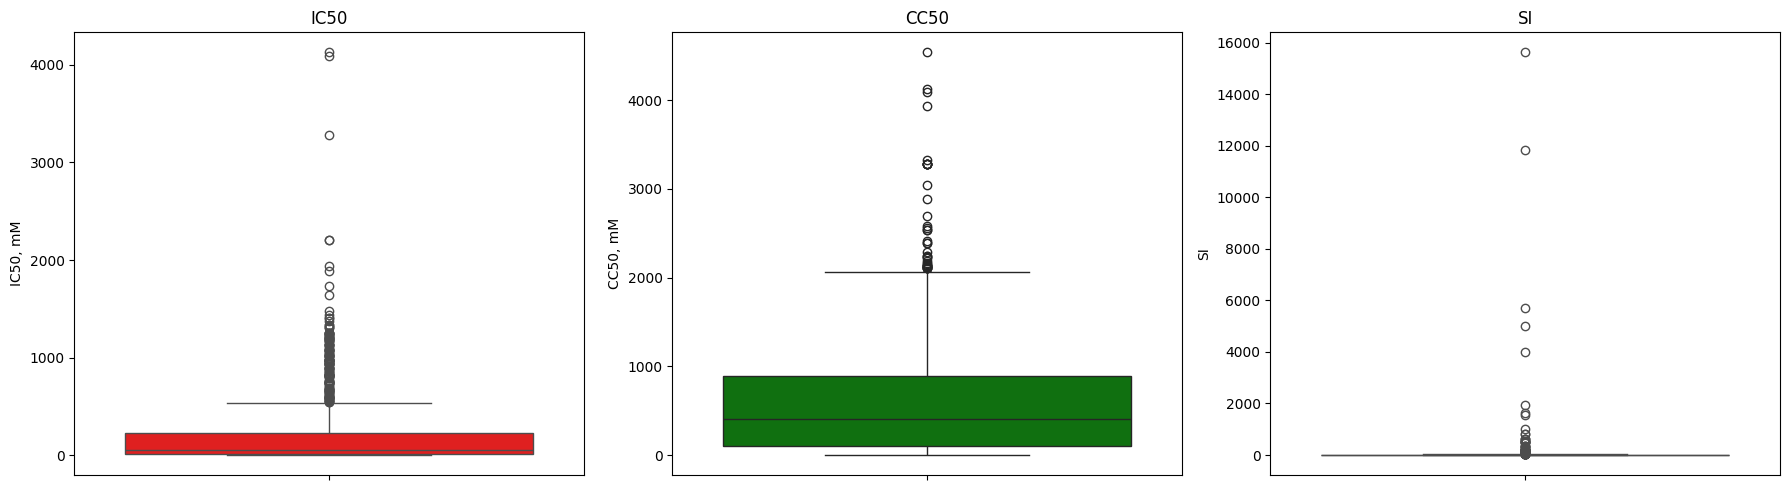

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, y='IC50, mM', ax=axes[0], color='red')
axes[0].set_title('IC50')

sns.boxplot(data=df, y='CC50, mM', ax=axes[1], color='green')
axes[1].set_title('CC50')

sns.boxplot(data=df, y='SI', ax=axes[2], color='blue')
axes[2].set_title('SI')

plt.tight_layout()
plt.show()

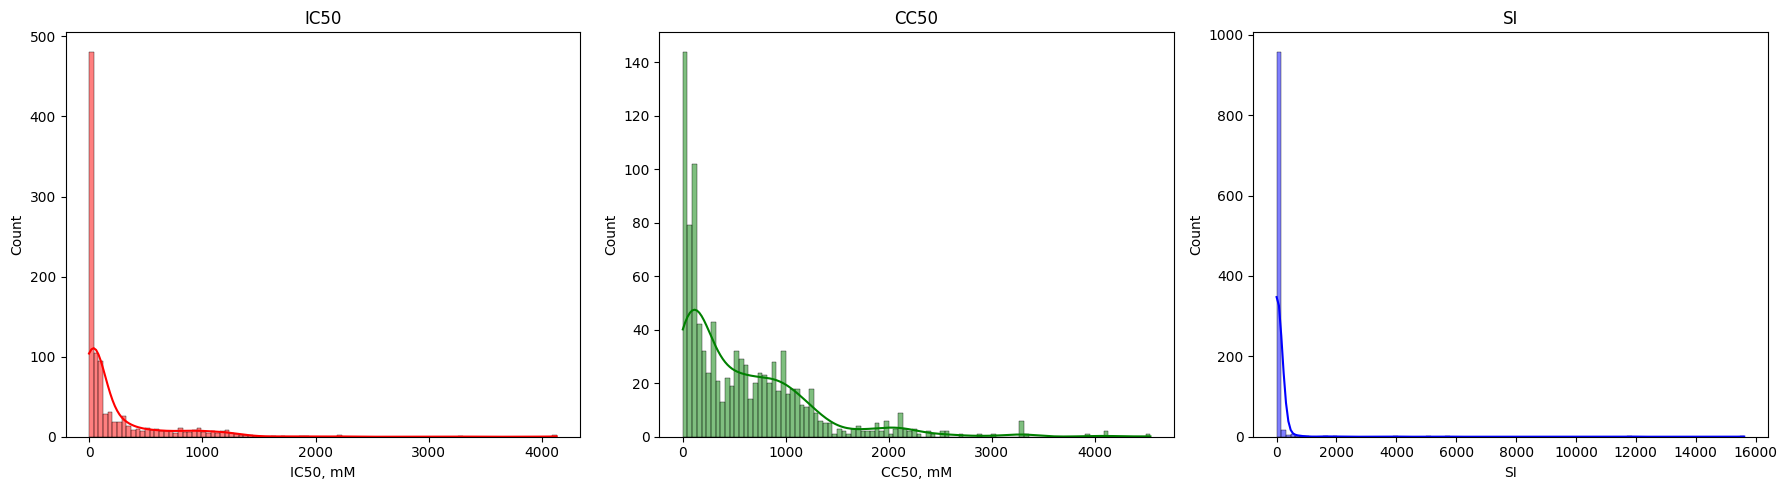

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['IC50, mM'], bins=100, kde=True, ax=axes[0], color='red')
axes[0].set_title('IC50')

sns.histplot(df['CC50, mM'], bins=100, kde=True, ax=axes[1], color='green')
axes[1].set_title('CC50')

sns.histplot(df['SI'], bins=100, kde=True, ax=axes[2], color='blue')
axes[2].set_title('SI')

plt.tight_layout()
plt.show()

На графиках можно заметить что целевые переменные имеют правостороннюю асимметрию - большинство значений сконцентрировано слева, выбросы справа<br>
Для задач регрессии это может привести к плохим показателям моделей, так как в задачах регрессии оптимизируются функции потерь, которые чувствительны к выбросам, такие как:
1. Среднеквадратичная ошибка (MSE)
2. Средняя абсолютная ошибка (MAE)

Для того чтобы нивелировать такой характер распределения данных, применим логорифмирование для целевых переменных это поможет нам:
1. Сжать шкалу (Для SI 15620 → 4.2)
2. Сделает распределение более нормальным
3. При этом сохраниться биологический смысл
4. Исключит потребность равного распределения выбросов между train, test выборками

Что будет если оставить данные как есть?
1. Модели будут оптимизироваться под выбросы
2. Метрики качества (MSE) потеряют смысл
3. Градиентные методы могут расходиться

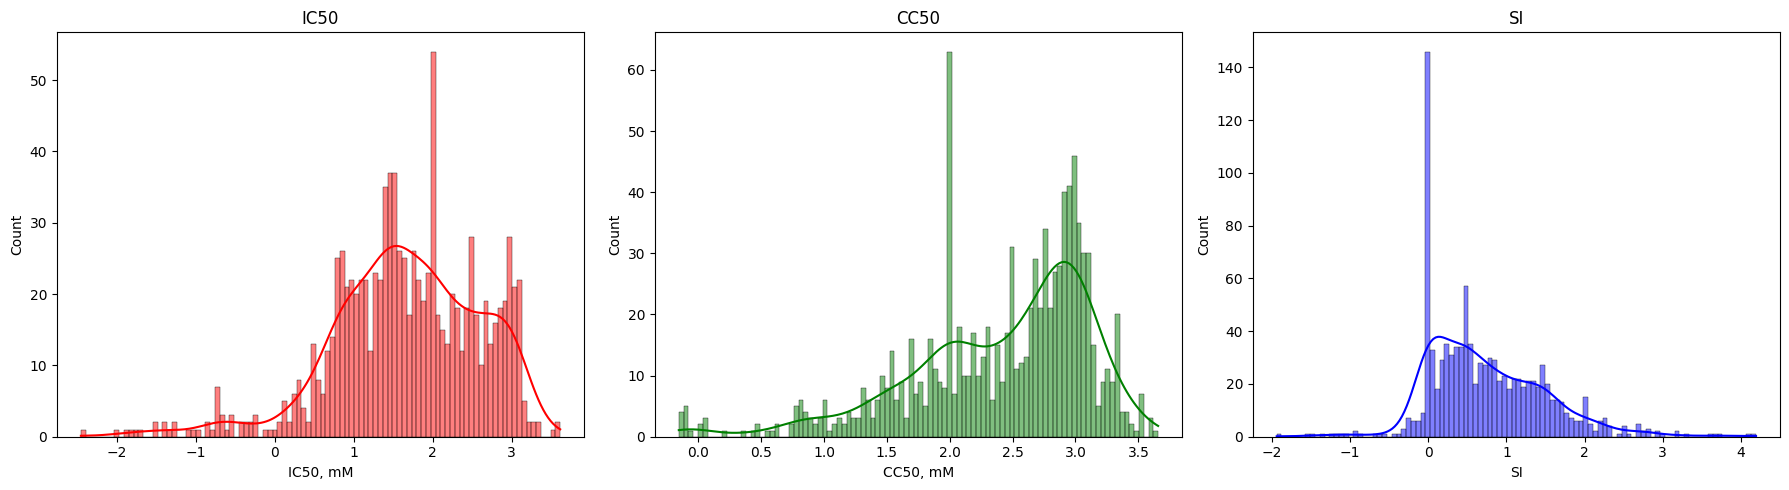

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(np.log10(df['IC50, mM']), bins=100, kde=True, ax=axes[0], color='red')
axes[0].set_title('IC50')

sns.histplot(np.log10(df['CC50, mM']), bins=100, kde=True, ax=axes[1], color='green')
axes[1].set_title('CC50')

sns.histplot(np.log10(df['SI']), bins=100, kde=True, ax=axes[2], color='blue')
axes[2].set_title('SI')

plt.tight_layout()
plt.show()

Для задач классификации создадим целевые бинарные переменные, где 
* 1 - Превышает
* 0 - Не превышает

In [79]:
df_without_tf = df.drop(['IC50, mM', 'CC50, mM', 'SI'] , axis=1)

classif_df_median_ic = df_without_tf
classif_df_median_ic['Target feature'] = [1 if i > df['IC50, mM'].median() else 0 for i in df['IC50, mM']]

classif_df_median_cc = df_without_tf
classif_df_median_cc['Target feature'] = [1 if i > df['CC50, mM'].median() else 0 for i in df['CC50, mM']]

classif_df_median_si = df_without_tf
classif_df_median_si['Target feature'] = [1 if i > df['SI'].median() else 0 for i in df['SI']]

classif_df_larger_si = df_without_tf
classif_df_larger_si['Target feature'] = [1 if i > 8 else 0 for i in df['SI']]

# Отбор признаков для задач регрессии и классификации

Построим корреляционную матрицу и посмотрим на признаки, которые коррелируют с целевыми.

Используем метод корреляции Кендала, так как мы имеем дело с химическими данными и как правило они имеют нелинейную зависимость

In [80]:
# Корреляционная матрица для признаков
correlation_matrix = df.corr(method='kendall')

# Тепловая карта корреляций
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

На корреляционной матрице видно, что большая часть признаков имеет очень малую коррелцию с целевыми переменными. 

Это обусловлено спецификой работы с химическими/биолгическими данными, как правило такие данные имеют сложные нелинейные зависимости

Выведем все признаки, которые имеют минимальную корреляцию с целевыми переменными используя различные коэффициенты корреляции

In [81]:
print('Корреляционная матрица, метод Кендала для IC50, mM')
for i, v in (df.corr(method='kendall')['IC50, mM']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)
else: 
    print()

print('Корреляционная матрица, метод Спирмена для IC50, mM')
for i, v in (df.corr(method='spearman')['IC50, mM']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)

Корреляционная матрица, метод Кендала для IC50, mM
CC50, mM 0.45549309545759514
SI -0.4803701677952594
NumSaturatedHeterocycles 0.2202020166557666

Корреляционная матрица, метод Спирмена для IC50, mM
CC50, mM 0.6214123585826321
SI -0.6427604964686184
BCUT2D_MWLOW 0.21236346297761136
PEOE_VSA7 -0.22818210997169625
SMR_VSA5 -0.21252411810383792
SlogP_VSA5 -0.2704956597843219
EState_VSA5 -0.2086854132120678
EState_VSA8 -0.2185011283235868
VSA_EState4 -0.25946072733672343
VSA_EState8 -0.23856444238636815
NumAliphaticCarbocycles -0.24507176242146328
NumAliphaticHeterocycles 0.2237514830617762
NumRotatableBonds -0.20868509922089218
NumSaturatedCarbocycles -0.20408030963282228
NumSaturatedHeterocycles 0.2778622363269765
fr_NH2 -0.2429797557165719


In [82]:
print('Корреляционная матрица, метод Кендала для CC50, mM')
for i, v in (df.corr(method='kendall')['CC50, mM']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)
else:
    print()
    
print('Корреляционная матрица, метод Спирмена для CC50, mM')
for i, v in (df.corr(method='spearman')['CC50, mM']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)

Корреляционная матрица, метод Кендала для CC50, mM
IC50, mM 0.45549309545759514
MolWt -0.20873863443369586
ExactMolWt -0.20833631278792705
NumValenceElectrons -0.20713299376064723
Chi0 -0.2077033574761861
Chi0v -0.2021827362283678
Chi1v -0.2011262953420069
Kappa1 -0.21281612006032966
Kappa2 -0.21594090030330335
Kappa3 -0.21169439402734566
LabuteASA -0.2056436893978153
HeavyAtomCount -0.20472176468010006
MolMR -0.20371359663701763

Корреляционная матрица, метод Спирмена для CC50, mM
IC50, mM 0.6214123585826321
MolWt -0.266392365783446
HeavyAtomMolWt -0.2514355300148024
ExactMolWt -0.2661487314783063
NumValenceElectrons -0.2777448653410462
FpDensityMorgan1 0.25471138263187976
FpDensityMorgan2 0.25731447404436214
BertzCT -0.20176273585831775
Chi0 -0.27759436360688555
Chi0n -0.2755718034846168
Chi0v -0.2781313373374284
Chi1 -0.2633573799565348
Chi1n -0.276383067560769
Chi1v -0.2797991948897243
Chi2n -0.24081883087842584
Chi2v -0.2548948444987574
Chi4n -0.2132260705165357
Chi4v -0.235594216

In [83]:
print('Корреляционная матрица, метод Кендала для SI')
for i, v in (df.corr(method='kendall')['SI']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)
else:
    print()
    
print('Корреляционная матрица, метод Спирмена для SI')
for i, v in (df.corr(method='spearman')['SI']).items():
    if v == 1:
        continue
    if v > 0.2:
        print(i, v)
    elif v < - 0.2:
        print(i, v)

Корреляционная матрица, метод Кендала для SI
IC50, mM -0.4803701677952594

Корреляционная матрица, метод Спирмена для SI
IC50, mM -0.6427604964686184
MaxAbsEStateIndex -0.20089158896827003
MaxEStateIndex -0.20089158896827003
NumSaturatedCarbocycles 0.20084513697918138
fr_Imine 0.21645292731400878


Как можно заметить, используя обычную корреляционную матрицу, нельзя с уверенностью сказать что признаки будут полезны для обучения моделей

Для отбора признаков, имеющие нелинейные зависимости попробуем применить несколько методов отбора:

1. Для регрессии:<br>
1.1. Mutual Info Regression - Mutual Info выявляет нелинейные зависимости, критичные для химических данных<br>
1.2. L1-регуляризация (Lasso) - Lasso отбирает признаки линейно влияющие на цель. <br>
1.3. Важность из Random Forest - Важность из RF учитывает взаимодействия признаков<br>

2. Для задач классификации:<br>
2.1. Mutual Info Classif - Mutual Info и ANOVA эффективны для бинарных задач. <br>
2.2. ANOVA F-value<br>
2.3. Важность из XGBoost - XGBoost автоматически определяет значимые признаки для пороговых решений<br>

Создадим 2 класса для отбора признаков для задач регрессии и для задач классификикации

Подготовим данные, разделив на признаки и целевую переменную

In [84]:
X_regression_ic, y_regression_ic = df_without_tf, np.log10(df['IC50, mM'])
X_regression_cc, y_regression_cc = df_without_tf, np.log10(df['CC50, mM'])
X_regression_si, y_regression_si = df_without_tf, np.log10(df['SI'])

X_ic_clss, y_ic_clss =  classif_df_median_ic.drop('Target feature', axis=1), classif_df_median_ic['Target feature']
X_cc_clss, y_cc_clss =  classif_df_median_cc.drop('Target feature', axis=1), classif_df_median_cc['Target feature']
X_si_clss, y_si_clss =  classif_df_median_si.drop('Target feature', axis=1), classif_df_median_si['Target feature']
y_class_larger_si = classif_df_larger_si['Target feature']

# Класс для отбора признаков для задачи Регрессии

In [85]:
class RegressionFeatureSelection:
    """
    Класс для получения списка отобранных признаков для задачи Регрессии
    X: DataFrame с признаками
    Y: Целевая переменная
    name_of_task str: название задачи
    """
    def __init__(self, X, Y, name_of_task: str):
        self.name = name_of_task
        self.X = X
        self.Y = Y
        self.X_stnd = StandardScaler().fit_transform((self.X))
        self._top_mi = None
        self._top_lasso = None
        self._top_xgb = None
        self._all_intersection_of_features = set()
    
    def feature_selection(self, k_value: int):
        """
        Метод отбора признаков, используя методы mutual_info_regression, Lasso, XGBRegressor
        k_value: int - количество признаков, которое будет отобрано в процессе работы методов

        Пересечение топ k_value признаков и будут теми признаками, что будут использоваться для обучения моделель машинного обучения
        """
        print(f'Ведем отбор {k_value} признаков\n')
        # Mutual Info
        mutual_info = mutual_info_regression(self.X, self.Y)
        self._top_mi = self.X.columns[mutual_info.argsort()[-k_value:]]
        
        # L1-регуляризация
        selector_lasso = SelectFromModel(Lasso(alpha=0.01)).fit(self.X_stnd, self.Y)
        self._top_lasso = self.X.columns[selector_lasso.get_support()][-k_value:]

        # XGBoost
        model = XGBRegressor(random_state=42).fit(self.X, self.Y)
        self._top_xgb = self.X.columns[model.feature_importances_.argsort()[-k_value:]]
        print(f'Топ {k_value} признаков используя методы Mutual Info Regression, Lasso и XGBRegressor отобраны')
        print('Для получения доступа к отобранным признакам, воспользуйтесь методами:\n')
        print('Для Mutual Info Regression - метод get_top_mutual_info')
        print('Для Lasso - метод get_top_lasso')
        print('Для XGBRegressor - метод get_top_xgb_regr\n')
        print('Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3')

    def get_top_mutual_info(self):
        """
        Метод получения топ признаков отобранных mutual_info_regression
        """
        return self._top_mi.to_list()

    def get_top_lasso(self):
        """
        Метод получения топ признаков отобранных Lasso
        """
        return self._top_lasso.to_list()

    def get_top_xgb_regr(self):
        """
        Метод получения топ признаков отобранных XGBRegressor
        """
        return self._top_xgb.to_list()
    
    def paint_venn3(self):
        """
        Метод создания списка перекрестного пересечения отобранных признаков и визуализация по средству venn3
        """
        core_features = set(self._top_mi) & set(self._top_lasso) & set(self._top_xgb)
        self._all_intersection_of_features.update(core_features)
        print('Ядро пересечений:\n', core_features, '\n')

        mi_lasso = set(self._top_mi) & set(self._top_lasso) - core_features
        self._all_intersection_of_features.update(mi_lasso)
        print('Пересечения Mutual Info Regression + Lasso:\n', mi_lasso, '\n')

        mi_xgb = set(self._top_mi) & set(self._top_xgb) - core_features
        self._all_intersection_of_features.update(mi_xgb)
        print('Пересечения Mutual Info Regression + XGBRegressor:\n', mi_xgb, '\n')

        lasso_xgb = set(self._top_lasso) & set(self._top_xgb) - core_features
        self._all_intersection_of_features.update(lasso_xgb)
        print('Пересечения Lasso + XGBRegressor:\n', lasso_xgb, '\n')

        print('Для получения списка перекрестных признаков, воспользуйтесь методом get_intersection_of_features\n')
        
        venn3(
            subsets=(set(self._top_mi), set(self._top_lasso), set(self._top_xgb)),
            set_labels=('Mutual Info Regression', 'L1-регуляризация (Lasso)', 'XGBRegressor'),
            set_colors=('#ff9999', '#66b3ff', '#99ff99'),
            alpha=0.7
        )
        plt.title(f'Пересечение важных признаков для задачи "{self.name}"')
        plt.show()
        print('Количество пересекающихся признаков:\n', len(self._all_intersection_of_features))


    def get_intersection_of_features(self):
        """
        Метод получения списка перекрестного пересечения отобранных признаков
        """
        print('Окончательный список выбранных признаков (все пересечения + ядро):\n', list(self._all_intersection_of_features))
        return list(self._all_intersection_of_features)

    def get_data_csv(self):
        """
        Метод формирования списка пересечения отобранных признаков
        """
        new_df = self.X[list(self._all_intersection_of_features)]
        new_df['Target Feature'] =  self.Y
        new_df.to_csv(f'Данные для построения модели, задача - {self.name}.csv', index=False)

Ведем отбор 60 признаков

Топ 60 признаков используя методы Mutual Info Regression, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Regression - метод get_top_mutual_info
Для Lasso - метод get_top_lasso
Для XGBRegressor - метод get_top_xgb_regr

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'Target feature', 'EState_VSA2'} 

Пересечения Mutual Info Regression + Lasso:
 {'EState_VSA8'} 

Пересечения Mutual Info Regression + XGBRegressor:
 {'Chi0n', 'HallKierAlpha', 'Chi0', 'BCUT2D_CHGHI', 'EState_VSA10', 'Kappa1', 'AvgIpc', 'SMR_VSA4', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'Chi4n', 'VSA_EState7', 'Chi0v', 'FpDensityMorgan3', 'Chi1n', 'PEOE_VSA1', 'Chi3v', 'Chi2v', 'Chi4v', 'BalabanJ', 'VSA_EState4', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'BCUT2D_LOGPLOW', 'MolLogP', 'VSA_EState8', 'NumValenceElectrons', 'MinAbsPartialCharge'} 

Пересечения Lasso + XGBReg

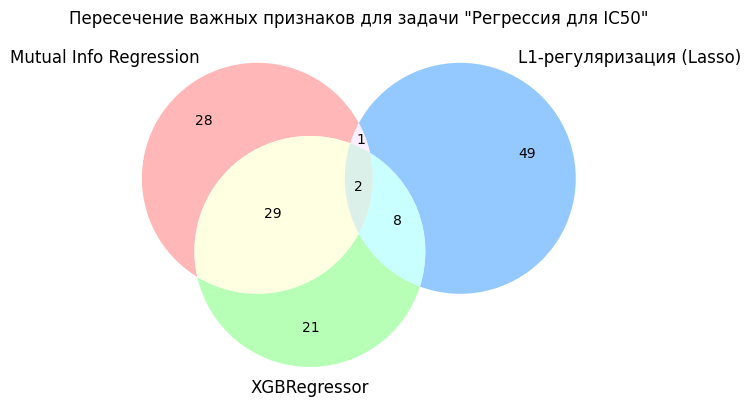

Количество пересекающихся признаков:
 40
Окончательный список выбранных признаков (все пересечения + ядро):
 ['Chi0n', 'HallKierAlpha', 'Chi0', 'BCUT2D_CHGHI', 'EState_VSA10', 'Target feature', 'Kappa1', 'AvgIpc', 'SMR_VSA4', 'fr_allylic_oxid', 'fr_amide', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'Chi4n', 'VSA_EState7', 'Chi0v', 'fr_Ar_NH', 'NumSaturatedHeterocycles', 'FpDensityMorgan3', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'fr_ketone', 'Chi3v', 'Chi2v', 'Chi4v', 'BalabanJ', 'VSA_EState4', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'BCUT2D_LOGPLOW', 'VSA_EState5', 'EState_VSA7', 'EState_VSA3', 'MolLogP', 'VSA_EState8', 'NumValenceElectrons', 'MinAbsPartialCharge', 'EState_VSA2']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\2553861294.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [86]:
ic_regr_feat_selec = RegressionFeatureSelection(X_regression_ic, y_regression_ic, 'Регрессия для IC50')
ic_regr_feat_selec.feature_selection(60)
ic_regr_feat_selec.paint_venn3()
ic_regr_feat_selec.get_intersection_of_features()
ic_regr_feat_selec.get_data_csv()

Ведем отбор 80 признаков

Топ 80 признаков используя методы Mutual Info Regression, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Regression - метод get_top_mutual_info
Для Lasso - метод get_top_lasso
Для XGBRegressor - метод get_top_xgb_regr

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'EState_VSA8', 'BCUT2D_CHGLO', 'BCUT2D_MRLOW', 'FpDensityMorgan3', 'SPS', 'VSA_EState5', 'EState_VSA3', 'Kappa3', 'PEOE_VSA8', 'BCUT2D_MWHI', 'SMR_VSA10', 'EState_VSA2', 'qed'} 

Пересечения Mutual Info Regression + Lasso:
 {'FpDensityMorgan1', 'EState_VSA4', 'Chi4v'} 

Пересечения Mutual Info Regression + XGBRegressor:
 {'Chi0n', 'SlogP_VSA6', 'MinPartialCharge', 'BCUT2D_CHGHI', 'SlogP_VSA1', 'TPSA', 'HeavyAtomMolWt', 'SMR_VSA7', 'Kappa1', 'AvgIpc', 'SMR_VSA4', 'BCUT2D_LOGPHI', 'SlogP_VSA5', 'RingCount', 'SMR_VSA6', 'VSA_EState7', 'FpDensityMorgan2', 'SlogP_VSA2', 'Sl

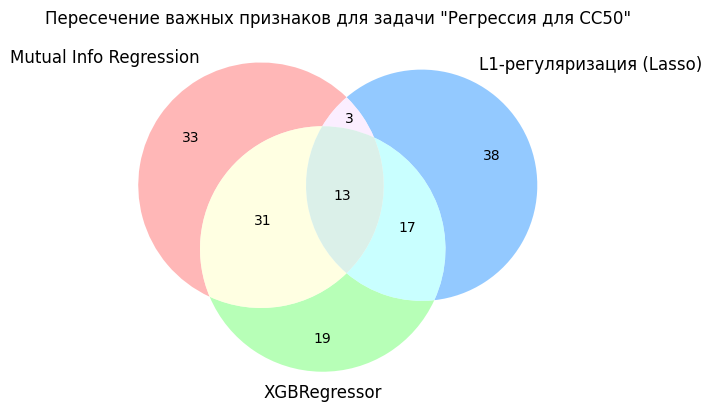

Количество пересекающихся признаков:
 64
Окончательный список выбранных признаков (все пересечения + ядро):
 ['Chi0n', 'SlogP_VSA6', 'MinPartialCharge', 'BCUT2D_CHGHI', 'SlogP_VSA1', 'TPSA', 'HeavyAtomMolWt', 'SMR_VSA7', 'Target feature', 'Kappa1', 'AvgIpc', 'SMR_VSA4', 'SlogP_VSA8', 'FpDensityMorgan1', 'PEOE_VSA2', 'fr_allylic_oxid', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'EState_VSA4', 'SlogP_VSA5', 'SPS', 'RingCount', 'fr_piperzine', 'SMR_VSA6', 'VSA_EState7', 'Kappa3', 'PEOE_VSA8', 'NumSaturatedHeterocycles', 'SMR_VSA5', 'FpDensityMorgan2', 'fr_NH2', 'SlogP_VSA2', 'FpDensityMorgan3', 'fr_Imine', 'fr_NH1', 'fr_C_O', 'SlogP_VSA4', 'NumAromaticHeterocycles', 'BCUT2D_MWHI', 'Chi1n', 'EState_VSA8', 'VSA_EState2', 'qed', 'Chi4v', 'BalabanJ', 'VSA_EState4', 'PEOE_VSA7', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'BCUT2D_LOGPLOW', 'PEOE_VSA12', 'Kappa2', 'VSA_EState5', 'PEOE_VSA5', 'EState_VSA7', 'NHOHCount', 'EState_VSA3', 'VSA_EState8', 'MolLogP', 'fr_bicyclic', 'PEOE_VSA6', 'PEOE_VSA3', 'SMR_VSA10', 'ES

C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\2553861294.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [101]:
ic_regr_feat_selec = RegressionFeatureSelection(X_regression_cc, y_regression_cc, 'Регрессия для CC50')
ic_regr_feat_selec.feature_selection(80)
ic_regr_feat_selec.paint_venn3()
ic_regr_feat_selec.get_intersection_of_features()
ic_regr_feat_selec.get_data_csv()

Ведем отбор 60 признаков

Топ 60 признаков используя методы Mutual Info Regression, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Regression - метод get_top_mutual_info
Для Lasso - метод get_top_lasso
Для XGBRegressor - метод get_top_xgb_regr

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'PEOE_VSA7', 'Target feature', 'VSA_EState8', 'PEOE_VSA2', 'EState_VSA1'} 

Пересечения Mutual Info Regression + Lasso:
 {'MinAbsEStateIndex', 'qed', 'BCUT2D_MWLOW'} 

Пересечения Mutual Info Regression + XGBRegressor:
 {'Chi0n', 'MaxAbsPartialCharge', 'HallKierAlpha', 'SMR_VSA4', 'AvgIpc', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'Chi1v', 'SlogP_VSA2', 'FpDensityMorgan3', 'EState_VSA9', 'BCUT2D_MRHI', 'Chi1n', 'VSA_EState2', 'VSA_EState4', 'BCUT2D_MRLOW', 'BCUT2D_LOGPLOW', 'VSA_EState5', 'MolLogP', 'MinAbsPartialCharge', 'NumValenceElectrons', 'SMR_VSA5', 'VSA_EState1'} 

Пер

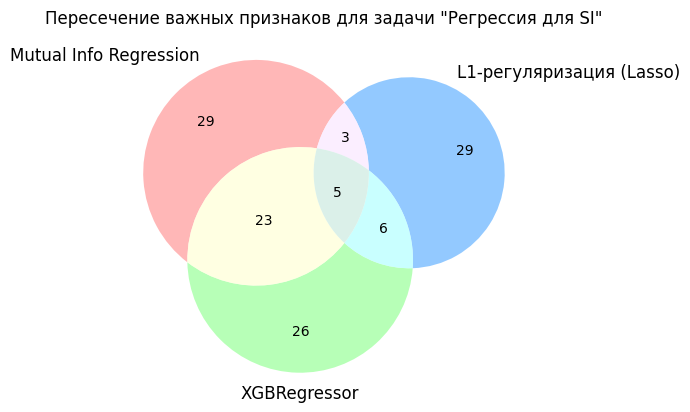

Количество пересекающихся признаков:
 37
Окончательный список выбранных признаков (все пересечения + ядро):
 ['Chi0n', 'SlogP_VSA2', 'FpDensityMorgan3', 'MaxAbsPartialCharge', 'HallKierAlpha', 'EState_VSA9', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'Target feature', 'SMR_VSA4', 'AvgIpc', 'Chi1n', 'VSA_EState2', 'PEOE_VSA2', 'qed', 'EState_VSA1', 'BCUT2D_LOGPHI', 'fr_aryl_methyl', 'fr_allylic_oxid', 'BalabanJ', 'BCUT2D_CHGLO', 'VSA_EState4', 'PEOE_VSA7', 'BCUT2D_MWLOW', 'BCUT2D_MRLOW', 'BCUT2D_LOGPLOW', 'EState_VSA4', 'VSA_EState5', 'fr_unbrch_alkane', 'VSA_EState8', 'MolLogP', 'MinAbsPartialCharge', 'NumValenceElectrons', 'SMR_VSA5', 'Chi1v', 'PEOE_VSA13', 'VSA_EState1']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\2553861294.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [88]:
ic_regr_feat_selec = RegressionFeatureSelection(X_regression_si, y_regression_si, 'Регрессия для SI')
ic_regr_feat_selec.feature_selection(60)
ic_regr_feat_selec.paint_venn3()
ic_regr_feat_selec.get_intersection_of_features()
ic_regr_feat_selec.get_data_csv()

# Класс для отбора признаков для задачи Классификации

In [89]:
class ClassifierFeatureSelection:
    """
    Класс для получения списка отобранных признаков для задачи Классификации
    X: DataFrame с признаками
    Y: Целевая переменная
    name_of_task str: название задачи
    """
    def __init__(self, X, Y, name_of_task):
        self.name = name_of_task
        self.X = X
        self.Y = Y
        self.X_stnd = StandardScaler().fit_transform((self.X))
        self._top_mi = None
        self._top_f_values = None
        self._top_xgb = None
        self._all_intersection_of_features = set()
    
    def feature_selection(self, k_value):
        """
        Метод отбора признаков, используя методы mutual_info_classif, f_classif, XGBClassifier
        k_value: int - количество признаков, которое будет отобрано в процессе работы методов

        Пересечение топ k_value признаков и будут теми признаками, что будут использоваться для обучения моделель машинного обучения
        """
        print(f'Ведем отбор {k_value} признаков\n')
        # Mutual Info
        mutual_info = mutual_info_classif(self.X, self.Y)
        self._top_mi = self.X.columns[mutual_info.argsort()[-k_value:]]
        
        # F-value
        f_values, _ = f_classif(self.X, self.Y)
        self._top_f_values = self.X.columns[np.argsort(f_values)[-50:]]

        # XGBoost
        model = XGBClassifier(random_state=42).fit(self.X, self.Y)
        self._top_xgb = self.X.columns[model.feature_importances_.argsort()[-k_value:]]
        print(f'Топ {k_value} признаков используя методы Mutual Info Classifier, Lasso и XGBRegressor отобраны')
        print('Для получения доступа к отобранным признакам, воспользуйтесь методами:\n')
        print('Для Mutual Info Classifier - метод get_top_mutual_info')
        print('Для F-values - метод get_top_f_values')
        print('Для XGBClassifier - метод get_top_xgb_clss\n')
        print('Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3')

    def get_top_mutual_info(self):
        """
        Метод получения топ признаков отобранных mutual_info_classif
        """
        return self._top_mi.to_list()

    def get_top_f_values(self):
        """
        Метод получения топ признаков отобранных f_classif
        """
        return self._top_f_values.to_list()

    def get_top_xgb_clss(self):
        """
        Метод получения топ признаков отобранных XGBClassifier
        """
        return self._top_xgb.to_list()
    
    def paint_venn3(self):
        """
        Метод создания списка перекрестного пересечения отобранных признаков и визуализация по средству venn3
        """
        core_features = set(self._top_mi) & set(self._top_f_values) & set(self._top_xgb)
        self._all_intersection_of_features.update(core_features)
        print('Ядро пересечений:\n', core_features, '\n')

        mi_f_values = set(self._top_mi) & set(self._top_f_values) - core_features
        self._all_intersection_of_features.update(mi_f_values)
        print('Пересечения Mutual Info Classifier + F-values:\n', mi_f_values, '\n')

        mi_xgb = set(self._top_mi) & set(self._top_xgb) - core_features
        self._all_intersection_of_features.update(mi_xgb)
        print('Пересечения Mutual Info Classifier + XGBClassifier:\n', mi_xgb, '\n')

        f_values_xgb = set(self._top_f_values) & set(self._top_xgb) - core_features
        self._all_intersection_of_features.update(f_values_xgb)
        print('Пересечения F-values + XGBClassifier:\n', f_values_xgb, '\n')

        print('Для получения списка перекрестных признаков, воспользуйтесь методом get_intersection_of_features\n')
        
        venn3(
            subsets=(set(self._top_mi), set(self._top_f_values), set(self._top_xgb)),
            set_labels=('Mutual Info Classifier', 'F-values', 'XGBClassifier'),
            set_colors=('#ff9999', '#66b3ff', '#99ff99'),
            alpha=0.7
        )
        plt.title(f'Пересечение важных признаков для задачи "{self.name}"')
        plt.show()
        print('Количество пересекающихся признаков:\n', len(self._all_intersection_of_features))


    def get_intersection_of_features(self):
        """
        Метод получения списка перекрестного пересечения отобранных признаков
        """
        print('Окончательный список выбранных признаков (все пересечения + ядро):\n', list(self._all_intersection_of_features))
        return list(self._all_intersection_of_features)

    def get_data_csv(self):
        """
        Метод формирования списка пересечения отобранных признаков
        """
        new_df = self.X[list(self._all_intersection_of_features)]
        new_df['Target Feature'] =  self.Y
        new_df.to_csv(f'Данные для построения модели, задача - {self.name}.csv', index=False)

In [90]:
X_ic_clss, y_ic_clss =  classif_df_median_ic.drop('Target feature', axis=1), classif_df_median_ic['Target feature']
X_cc_clss, y_cc_clss =  classif_df_median_cc.drop('Target feature', axis=1), classif_df_median_cc['Target feature']
X_si_clss, y_si_clss =  classif_df_median_si.drop('Target feature', axis=1), classif_df_median_si['Target feature']
y_class_larger_si = classif_df_larger_si['Target feature']

Ведем отбор 60 признаков



g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  69  82 143 147 156 158 160 162 163 174 175 178 186 192 193 197 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Топ 60 признаков используя методы Mutual Info Classifier, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Classifier - метод get_top_mutual_info
Для F-values - метод get_top_f_values
Для XGBClassifier - метод get_top_xgb_clss

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'MinEStateIndex', 'HallKierAlpha', 'VSA_EState5', 'EState_VSA10', 'SMR_VSA7', 'FractionCSP3', 'MaxAbsEStateIndex'} 

Пересечения Mutual Info Classifier + F-values:
 {'VSA_EState4', 'SMR_VSA1', 'SlogP_VSA6', 'MaxEStateIndex', 'SlogP_VSA5', 'SMR_VSA4', 'SMR_VSA5', 'EState_VSA1'} 

Пересечения Mutual Info Classifier + XGBClassifier:
 {'Chi1', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SPS', 'PEOE_VSA8', 'Chi1v', 'PEOE_VSA9', 'FpDensityMorgan3', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'BCU

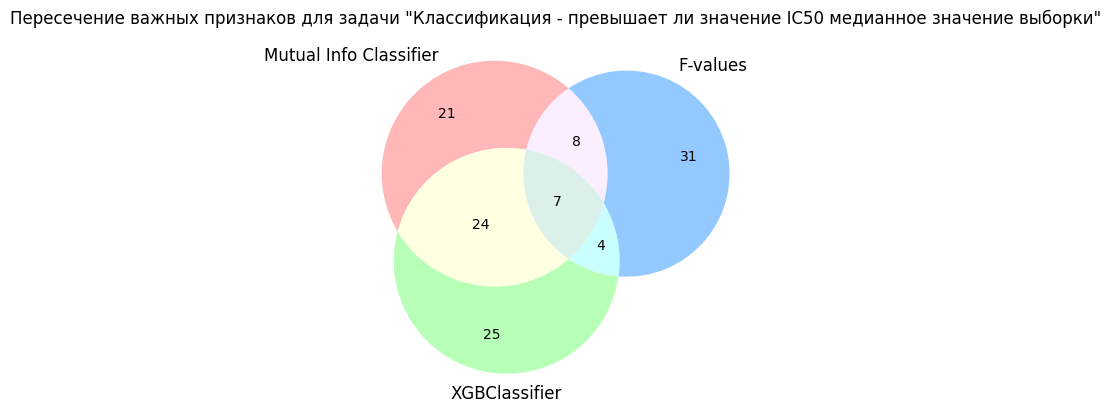

Количество пересекающихся признаков:
 43
Окончательный список выбранных признаков (все пересечения + ядро):
 ['HallKierAlpha', 'Chi1', 'SlogP_VSA6', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'EState_VSA10', 'SMR_VSA7', 'SMR_VSA4', 'fr_allylic_oxid', 'EState_VSA1', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'SPS', 'PEOE_VSA8', 'NumAromaticCarbocycles', 'NumSaturatedHeterocycles', 'Chi1v', 'PEOE_VSA9', 'FpDensityMorgan3', 'MaxEStateIndex', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'Chi1n', 'FractionCSP3', 'PEOE_VSA1', 'EState_VSA8', 'VSA_EState1', 'qed', 'VSA_EState4', 'MinEStateIndex', 'SMR_VSA1', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'VSA_EState5', 'EState_VSA3', 'PEOE_VSA6', 'MinAbsPartialCharge', 'SMR_VSA5', 'MaxAbsEStateIndex']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\4206051785.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [91]:
ic_median_clss_feat_selec = ClassifierFeatureSelection(X_ic_clss, y_ic_clss, 'Классификация - превышает ли значение IC50 медианное значение выборки')
ic_median_clss_feat_selec.feature_selection(60)
ic_median_clss_feat_selec.paint_venn3()
ic_median_clss_feat_selec.get_intersection_of_features()
ic_median_clss_feat_selec.get_data_csv()

In [92]:
ic_median_clss_feat_selec.get_data_csv()


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\4206051785.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


Ведем отбор 60 признаков



g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  69  82 143 147 156 158 160 162 163 174 175 178 186 192 193 197 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Топ 60 признаков используя методы Mutual Info Classifier, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Classifier - метод get_top_mutual_info
Для F-values - метод get_top_f_values
Для XGBClassifier - метод get_top_xgb_clss

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'MinEStateIndex', 'HallKierAlpha', 'VSA_EState5', 'EState_VSA10', 'SMR_VSA7', 'MaxAbsEStateIndex', 'FractionCSP3', 'VSA_EState1'} 

Пересечения Mutual Info Classifier + F-values:
 {'VSA_EState4', 'SMR_VSA1', 'SlogP_VSA6', 'MaxEStateIndex', 'SlogP_VSA5', 'VSA_EState6', 'SMR_VSA4', 'SMR_VSA5'} 

Пересечения Mutual Info Classifier + XGBClassifier:
 {'Chi1', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SPS', 'PEOE_VSA8', 'Chi1v', 'PEOE_VSA9', 'FpDensityMorgan3', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'BCUT2D_MR

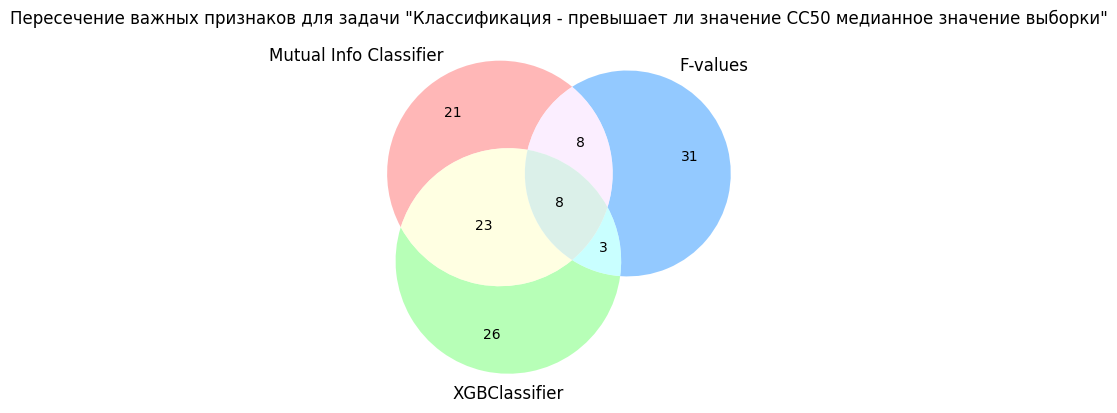

Количество пересекающихся признаков:
 42
Окончательный список выбранных признаков (все пересечения + ядро):
 ['HallKierAlpha', 'Chi1', 'SlogP_VSA6', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'EState_VSA10', 'VSA_EState6', 'SMR_VSA7', 'SMR_VSA4', 'fr_allylic_oxid', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'SPS', 'PEOE_VSA8', 'NumAromaticCarbocycles', 'NumSaturatedHeterocycles', 'Chi1v', 'PEOE_VSA9', 'FpDensityMorgan3', 'MaxEStateIndex', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'VSA_EState1', 'FractionCSP3', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'VSA_EState4', 'MinEStateIndex', 'SMR_VSA1', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'VSA_EState5', 'EState_VSA3', 'PEOE_VSA6', 'MinAbsPartialCharge', 'SMR_VSA5', 'MaxAbsEStateIndex']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\4206051785.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [98]:
cc_median_clss_feat_selec = ClassifierFeatureSelection(X_cc_clss, y_cc_clss, 'Классификация - превышает ли значение CC50 медианное значение выборки')
cc_median_clss_feat_selec.feature_selection(60)
cc_median_clss_feat_selec.paint_venn3()
cc_median_clss_feat_selec.get_intersection_of_features()
cc_median_clss_feat_selec.get_data_csv()

Ведем отбор 60 признаков



g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  69  82 143 147 156 158 160 162 163 174 175 178 186 192 193 197 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Топ 60 признаков используя методы Mutual Info Classifier, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Classifier - метод get_top_mutual_info
Для F-values - метод get_top_f_values
Для XGBClassifier - метод get_top_xgb_clss

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'MinEStateIndex', 'HallKierAlpha', 'VSA_EState5', 'EState_VSA10', 'SMR_VSA7', 'MaxAbsEStateIndex', 'FractionCSP3', 'VSA_EState1'} 

Пересечения Mutual Info Classifier + F-values:
 {'VSA_EState4', 'SMR_VSA1', 'SlogP_VSA6', 'SlogP_VSA5', 'MaxEStateIndex', 'BertzCT', 'VSA_EState6', 'SMR_VSA4', 'SMR_VSA5'} 

Пересечения Mutual Info Classifier + XGBClassifier:
 {'Chi1', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SPS', 'PEOE_VSA8', 'Chi1v', 'PEOE_VSA9', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed'

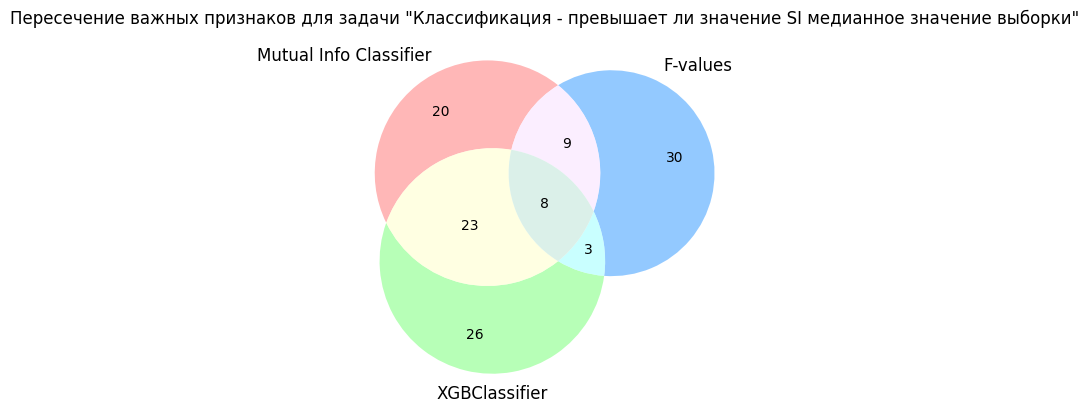

Количество пересекающихся признаков:
 43
Окончательный список выбранных признаков (все пересечения + ядро):
 ['HallKierAlpha', 'Chi1', 'SlogP_VSA6', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'EState_VSA10', 'VSA_EState6', 'SMR_VSA7', 'SMR_VSA4', 'fr_allylic_oxid', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'SPS', 'BertzCT', 'PEOE_VSA8', 'NumAromaticCarbocycles', 'NumSaturatedHeterocycles', 'Chi1v', 'PEOE_VSA9', 'MaxEStateIndex', 'ExactMolWt', 'VSA_EState3', 'BCUT2D_MRHI', 'MinAbsEStateIndex', 'VSA_EState1', 'FractionCSP3', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'VSA_EState4', 'MinEStateIndex', 'SMR_VSA1', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'VSA_EState5', 'EState_VSA3', 'PEOE_VSA6', 'MinAbsPartialCharge', 'SMR_VSA5', 'MaxAbsEStateIndex']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\4206051785.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [94]:
si_median_clss_feat_selec = ClassifierFeatureSelection(X_si_clss, y_si_clss, 'Классификация - превышает ли значение SI медианное значение выборки')
si_median_clss_feat_selec.feature_selection(60)
si_median_clss_feat_selec.paint_venn3()
si_median_clss_feat_selec.get_intersection_of_features()
si_median_clss_feat_selec.get_data_csv()

Ведем отбор 60 признаков



g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 10  69  82 143 147 156 158 160 162 163 174 175 178 186 192 193 197 206] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
g:\PythonProject\Educational_Folder\gihub_ml\Coursework_Classik_ML\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Топ 60 признаков используя методы Mutual Info Classifier, Lasso и XGBRegressor отобраны
Для получения доступа к отобранным признакам, воспользуйтесь методами:

Для Mutual Info Classifier - метод get_top_mutual_info
Для F-values - метод get_top_f_values
Для XGBClassifier - метод get_top_xgb_clss

Для визуализации графика пересечений признаков venn3, воспользуйтесь методом paint_venn3
Ядро пересечений:
 {'MinEStateIndex', 'HallKierAlpha', 'VSA_EState5', 'SMR_VSA7', 'MaxAbsEStateIndex', 'FractionCSP3', 'VSA_EState1'} 

Пересечения Mutual Info Classifier + F-values:
 {'VSA_EState4', 'SMR_VSA1', 'SlogP_VSA6', 'MaxEStateIndex', 'SlogP_VSA5', 'SMR_VSA4', 'SMR_VSA5'} 

Пересечения Mutual Info Classifier + XGBClassifier:
 {'Chi1', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SPS', 'PEOE_VSA8', 'Chi1v', 'PEOE_VSA9', 'ExactMolWt', 'Ipc', 'VSA_EState3', 'BCUT2D_MRHI', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'EState_VSA3', 'PEOE_V

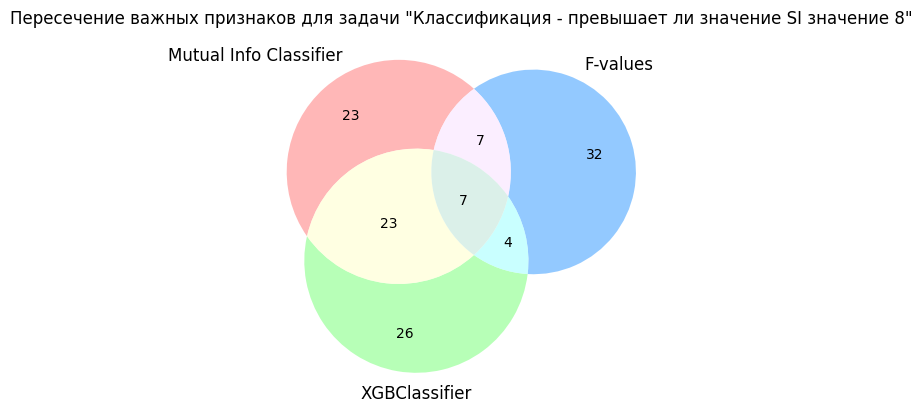

Количество пересекающихся признаков:
 41
Окончательный список выбранных признаков (все пересечения + ядро):
 ['HallKierAlpha', 'Chi1', 'SlogP_VSA6', 'Chi0', 'BCUT2D_CHGHI', 'MinPartialCharge', 'EState_VSA10', 'SMR_VSA7', 'SMR_VSA4', 'fr_allylic_oxid', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'SlogP_VSA5', 'SPS', 'PEOE_VSA8', 'NumAromaticCarbocycles', 'NumSaturatedHeterocycles', 'Chi1v', 'PEOE_VSA9', 'MaxEStateIndex', 'ExactMolWt', 'Ipc', 'VSA_EState3', 'BCUT2D_MRHI', 'VSA_EState1', 'FractionCSP3', 'Chi1n', 'PEOE_VSA1', 'EState_VSA8', 'qed', 'VSA_EState4', 'MinEStateIndex', 'SMR_VSA1', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'VSA_EState5', 'EState_VSA3', 'PEOE_VSA6', 'MinAbsPartialCharge', 'SMR_VSA5', 'MaxAbsEStateIndex']


C:\Users\Администратор\AppData\Local\Temp\ipykernel_8764\4206051785.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target Feature'] =  self.Y


In [95]:
ic_median_clss_feat_selec = ClassifierFeatureSelection(X_si_clss, y_class_larger_si, 'Классификация - превышает ли значение SI значение 8')
ic_median_clss_feat_selec.feature_selection(60)
ic_median_clss_feat_selec.paint_venn3()
ic_median_clss_feat_selec.get_intersection_of_features()
ic_median_clss_feat_selec.get_data_csv()